In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
#print(dir(TextBlob))

In [3]:
df = pd.read_excel ('Reviews _ Glassdoor.xlsx') 
df.head()

,Title,Rating of Company,Current/Former Employee,Review title,Location Worked at,Pros,Cons
0,"Oct 7, 2020 - Sales Associate",5.0,"Current Employee, less than 1 year",Great,"in Tamarac, FL",Great company worked there for 10 years,None great company all around
1,"Nov 10, 2020 - Associate Brand Manager",4.0,"Current Employee, more than 5 years",Great experience and opportunity to grow network,"in New York, NY",Lots of opportunities to increase your network...,Little to no mobility or career pathing. If yo...
2,"Feb 23, 2021 - Senior Consultant",4.0,"Current Employee, more than 5 years","Good brands, bad culture","in New York, NY",good brands with a lot of history,Company Culture is not the best
3,"Feb 11, 2021 - Marketing",2.0,"Former Employee, less than 1 year",EH,NaN,"Great benefits, a lot of access to great agenc...","lacks diversity in leadership, poor training, ..."
4,"Feb 4, 2021 - Finance and Business Analyst",3.0,"Current Employee, less than 1 year",Good,"in New York, NY",Great perks (allowance for drinks),"Long hours, culture not terrible but an adjust..."


In [4]:
df1 = df[['Pros', 'Cons']]

df1.head()

,Pros,Cons
0,Great company worked there for 10 years,None great company all around
1,Lots of opportunities to increase your network...,Little to no mobility or career pathing. If yo...
2,good brands with a lot of history,Company Culture is not the best
3,"Great benefits, a lot of access to great agenc...","lacks diversity in leadership, poor training, ..."
4,Great perks (allowance for drinks),"Long hours, culture not terrible but an adjust..."


In [5]:

#The function below separate department from date
def split_word (word):
    return word.split('-')[1]

df1 ['Ratings'] = df['Rating of Company']

# Function Split_word applied
df1['Dept.'] = df['Title'].apply(lambda x: split_word(x))

# The function to remove escape characters like \r\n
def cleanText (word):
    return re.sub("\r|\n|-|,", " ", word)

# CleanText applied
df1['pros_clean'] = df['Pros'].apply(lambda x: cleanText(x))
df1['cons_clean'] = df['Cons'].apply(lambda x: cleanText(x))

# get sentiment polarity
def senti (word):
    return TextBlob(word).sentiment.polarity

df1['sentiment_pros'] = df1['pros_clean'].apply(lambda x: senti(x))
df1['sentiment_cons'] = df1['cons_clean'].apply(lambda x: senti(x))

# Delete unclean columns i.e Pros & Cons
del df1['Pros']
del df1['Cons']

df1.head()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Ratings,Dept.,pros_clean,cons_clean,sentiment_pros,sentiment_cons
0,5.0,Sales Associate,Great company worked there for 10 years,None great company all around,0.800000,0.800000
1,4.0,Associate Brand Manager,Lots of opportunities to increase your network...,Little to no mobility or career pathing. If yo...,0.230000,0.048106
2,4.0,Senior Consultant,good brands with a lot of history,Company Culture is not the best,0.700000,1.000000
3,2.0,Marketing,Great benefits a lot of access to great agenc...,lacks diversity in leadership poor training ...,0.533333,-0.293750
4,3.0,Finance and Business Analyst,Great perks (allowance for drinks),Long hours culture not terrible but an adjust...,0.800000,0.150000


In [6]:
#Getting overall polarity by adding pros and cons

df1['overall_polarity'] = df1[ 'sentiment_cons'] + df1['sentiment_pros']
df1.head()

,Ratings,Dept.,pros_clean,cons_clean,sentiment_pros,sentiment_cons,overall_polarity
0,5.0,Sales Associate,Great company worked there for 10 years,None great company all around,0.800000,0.800000,1.600000
1,4.0,Associate Brand Manager,Lots of opportunities to increase your network...,Little to no mobility or career pathing. If yo...,0.230000,0.048106,0.278106
2,4.0,Senior Consultant,good brands with a lot of history,Company Culture is not the best,0.700000,1.000000,1.700000
3,2.0,Marketing,Great benefits a lot of access to great agenc...,lacks diversity in leadership poor training ...,0.533333,-0.293750,0.239583
4,3.0,Finance and Business Analyst,Great perks (allowance for drinks),Long hours culture not terrible but an adjust...,0.800000,0.150000,0.950000


##### Applying stopwords in other to visualise prevalent words

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
# The function remove escape characters like \r\n
#def cleanTextt (word):
    #return re.sub("\d", "", word)

stop = stopwords.words()

#tokens_rem_sw = [word for word in words if not word in stopwords.words(words)]


df1 ['stopwords_rem_pros'] = df1['pros_clean'].apply(lambda x: [word for word in x.split() if word not in stop])
df1 ['stopwords_rem_cons'] = df1['cons_clean'].apply(lambda x: [word for word in x.split() if word not in stop])

#df1 ['stopwords_rem_pros'] = df1 ['stopwords_rem_pros'].apply(lambda x: cleanTextt(x))
#df1 ['stopwords_rem_cons'] = df1 ['stopwords_rem_cons'].apply(lambda x: cleanTextt(x))

df1.stopwords_rem_pros

0                    [Great, company, worked, 10, years]
1      [Lots, opportunities, increase, network, many,...
2                           [good, brands, lot, history]
3      [Great, benefits, lot, access, great, agencies...
4                    [Great, perks, (allowance, drinks)]
                             ...                        
104    [nice, products, famous, brands, well, known, ...
105    [Some, cool, people, great, brands, establishe...
106    [Excellent, mobility, opportunities, overseas,...
107    [Branded, company., Good, people, loves, drink...
108         [various, brand, marketing, mission, events]
Name: stopwords_rem_pros, Length: 109, dtype: object

In [9]:
data = df1 [['Dept.', 'Ratings', 'stopwords_rem_pros', 'stopwords_rem_cons' ]]
data.head()

,Dept.,Ratings,stopwords_rem_pros,stopwords_rem_cons
0,Sales Associate,5.0,"[Great, company, worked, 10, years]","[None, great, company, around]"
1,Associate Brand Manager,4.0,"[Lots, opportunities, increase, network, many,...","[Little, mobility, career, pathing., If, move,..."
2,Senior Consultant,4.0,"[good, brands, lot, history]","[Company, Culture, best]"
3,Marketing,2.0,"[Great, benefits, lot, access, great, agencies...","[lacks, diversity, leadership, poor, training,..."
4,Finance and Business Analyst,3.0,"[Great, perks, (allowance, drinks)]","[Long, hours, culture, terrible, adjustment, f..."


### VADER SENTIMENT ANALYSIS

In [10]:
# VADER SENTIMENT ANALYSIS

def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    vsa = SentimentIntensityAnalyzer()
  
    # Get polarity scores
    sentiment_dict = vsa.polarity_scores(sentence)
    
  
    # Return Compound score
    return sentiment_dict['compound']

# Apply Vader compound sentiment
df1['polarity_pros'] = df1['pros_clean'].apply(lambda x: sentiment_scores(x))
df1['polarity_cons'] = df1['cons_clean'].apply(lambda x: sentiment_scores(x))

# Delete unwanted columns 
#del df1['sentiment_pros']
#del df1['sentiment_cons']
#del df1['overall_polarity']
#del df1['stopwords_rem_pros']
#del df1['stopwords_rem_cons']


df1 ['polarity_overall'] = df1 ['polarity_pros'] + df1 ['polarity_cons']


# Get POSITIVE, NEGATIVE and NUETRAL label
def pol_label (word):
  
    # decide sentiment as positive, negative or neutral
    if word >= 0.05 :
        return "Positive"
        #data['polarity'] = 'Positive'
  
    elif word <= - 0.05 :
        return "Negative"
        #print("Negative")
  
    else :
        return "Neutral"
       # print("Neutral")

df1 ['polarity_label'] = df1['polarity_overall'].apply(lambda x: pol_label(x))

df1.head(30)


,Ratings,Dept.,pros_clean,cons_clean,sentiment_pros,sentiment_cons,overall_polarity,stopwords_rem_pros,stopwords_rem_cons,polarity_pros,polarity_cons,polarity_overall,polarity_label
0,5.0,Sales Associate,Great company worked there for 10 years,None great company all around,0.800000,0.800000,1.600000,"[Great, company, worked, 10, years]","[None, great, company, around]",0.6249,-0.5096,0.1153,Positive
1,4.0,Associate Brand Manager,Lots of opportunities to increase your network...,Little to no mobility or career pathing. If yo...,0.230000,0.048106,0.278106,"[Lots, opportunities, increase, network, many,...","[Little, mobility, career, pathing., If, move,...",0.7430,0.5542,1.2972,Positive
2,4.0,Senior Consultant,good brands with a lot of history,Company Culture is not the best,0.700000,1.000000,1.700000,"[good, brands, lot, history]","[Company, Culture, best]",0.4404,-0.5216,-0.0812,Negative
3,2.0,Marketing,Great benefits a lot of access to great agenc...,lacks diversity in leadership poor training ...,0.533333,-0.293750,0.239583,"[Great, benefits, lot, access, great, agencies...","[lacks, diversity, leadership, poor, training,...",0.8957,-0.4767,0.4190,Positive
4,3.0,Finance and Business Analyst,Great perks (allowance for drinks),Long hours culture not terrible but an adjust...,0.800000,0.150000,0.950000,"[Great, perks, (allowance, drinks)]","[Long, hours, culture, terrible, adjustment, f...",0.6249,0.1967,0.8216,Positive
5,3.0,Executive Assistant,good pay and a growing culture,work life balance especially during covid,0.700000,0.000000,0.700000,"[good, pay, growing, culture]","[work, life, balance, especially, covid]",0.4939,0.0000,0.4939,Positive
6,4.0,Analyst,Great CEO amazing brands travel opportunities,Very finance based. Need a refresh of upper ma...,0.700000,0.100000,0.800000,"[Great, CEO, amazing, brands, travel, opportun...","[Very, finance, based., Need, refresh, upper, ...",0.8885,0.0000,0.8885,Positive
7,2.0,Marketing,Brand Portfolio best in the business,Leadership capabilities lacking professional...,1.000000,0.190000,1.190000,"[Brand, Portfolio, best, business]","[Leadership, capabilities, lacking, profession...",0.6369,0.7964,1.4333,Positive
8,1.0,Marketing,There are none that come to mind,disrespectful no follow up privileged,0.000000,0.000000,0.000000,"[There, none, mind]","[disrespectful, follow, privileged]",0.0000,0.1779,0.1779,Positive
9,4.0,Product Development,Great perks Work life balance Good benefit...,Difficult to move up Brands are very siloed,0.750000,-0.150000,0.600000,"[Great, perks, Work, life, balance, Good, bene...","[Difficult, move, Brands, siloed]",0.8625,-0.3612,0.5013,Positive


In [11]:
df1.to_excel("Employees review final.xlsx")

## VISUALISATION

### WordCloud

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

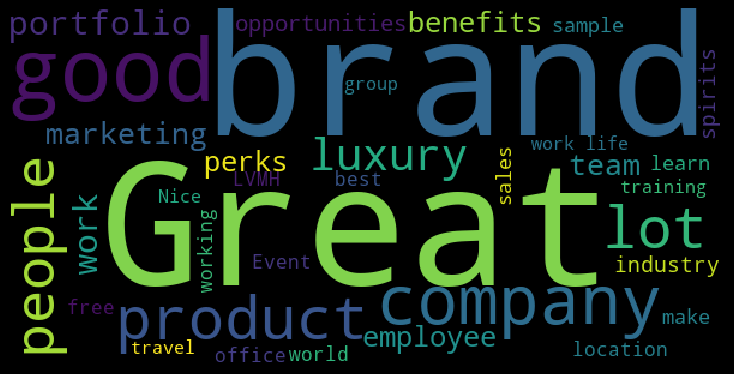

In [13]:

text = df1['pros_clean'].values 
wordcloud = WordCloud(width=600, height=300, max_words=35, random_state=10).generate(str(text))
#background_color='#30D0D0', colormap="Accent",

#plt.imshow(wordcloud)
plt.figure(figsize=(10, 5), facecolor='k')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)


#To save the plot as png
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [1]:
text2 = df1['cons_clean'].values 
wordcloud2 = WordCloud(width=600, height=300, max_words=35, random_state=10).generate(str(text2))
#background_color='#30D0D0', colormap="Accent",


plt.figure(figsize=(10, 5), facecolor='k')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud2)

NameError: name 'df1' is not defined

In [ ]:
# SEABORN COLOR PALETTE

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, 
GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, 
Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, 
Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, 
YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, 
gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, 
hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

### Charts

In [15]:
import seaborn as sns

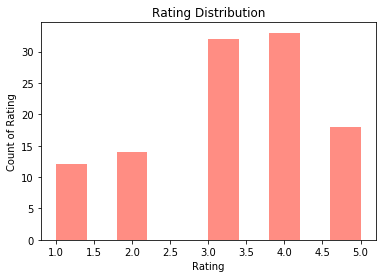

In [16]:
# BAR CHART of Rating Distribution

themes = sns.color_palette("flag")[3] #choosing color

plt.hist(df1["Ratings"], alpha=0.5,color= themes)

plt.xlabel("Rating")
plt.ylabel("Count of Rating")
plt.title("Rating Distribution")

plt.show()

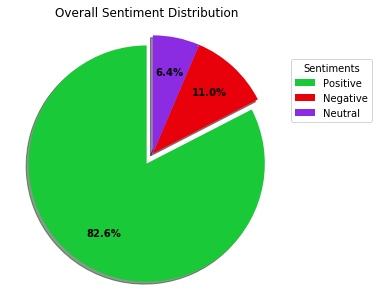

In [17]:
# PIE CHART of Overall Sentiment


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df1["polarity_label"].unique()

explode = (0.1, 0, 0, )  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))

theme = sns.color_palette("bright")[2:5] #choosing color



wedges, texts, autotexts = ax1.pie(df1["polarity_label"].value_counts(), explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.7, colors=theme)

ax1.legend(wedges, labels,
          title="Sentiments",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1.5))

plt.setp(autotexts, size=10, weight="bold")


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Overall Sentiment Distribution")
plt.show()

## Creating Summary

In [23]:
# Joining Pros and Cons columns

def textMerge (a,b):
    txt = " ".join(a)
    txt2 = " ".join(b)
    word = txt + txt2
    return re.sub("\r|\n|-|", "", word)

review = textMerge(text, text2).strip()

In [52]:
# Tokenizing words
stopWords = set(stopwords.words("english"))

# Creating frequency table to keep each words
words_freq = word_tokenize(review)

freqTable = dict()
for word in words_freq:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] +=1
    else:
        freqTable[word] = 1
        
    
# Tokenizing words Sentences
sentences = sent_tokenize(review)

sentenceTable = dict()
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceTable:
                sentenceTable[sentence] +=freq
            else:
                sentenceTable[sentence] = freq

                
sumValues = 0
for sentence in sentenceTable:
    sumValues += sentenceTable[sentence]
    
# Getting average value of a sentence from the original text
average = int(sumValues/len(sentenceTable))

# Storing sentences into our summary
summary = " "
for sentence in sentences:
    if (sentence in sentenceTable) and (sentenceTable[sentence] > (1.2*average)):
        summary = " " + sentence
        
print (summary)


 Selfish and careless Management Lack of leadership from top management  Human resource disconnect...they are clueless  often top managers bring their teams from last place of employment  little or no chance of promotion from within Long Hours   Lack of work and life balance No decision making from management.


In [53]:
# Creating 

#print(sentenceTable)

## USING SPACY TO SUMMARIZE

In [18]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation 

In [148]:
print (dir(spacy))

['Any', 'Config', 'Dict', 'Errors', 'Iterable', 'Language', 'Path', 'Union', 'Vocab', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'about', 'attrs', 'blank', 'cli', 'compat', 'displacy', 'errors', 'explain', 'git_info', 'glossary', 'info', 'kb', 'lang', 'language', 'lexeme', 'load', 'logger', 'lookups', 'matcher', 'ml', 'morphology', 'parts_of_speech', 'pipe_analysis', 'pipeline', 'prefer_gpu', 'registry', 'require_cpu', 'require_gpu', 'schemas', 'scorer', 'setup_default_warnings', 'strings', 'symbols', 'sys', 'tokenizer', 'tokens', 'training', 'util', 'vectors', 'vocab']


In [154]:
help(spacy.tokens)

Help on package spacy.tokens in spacy:

NAME
    spacy.tokens

PACKAGE CONTENTS
    _dict_proxies
    _retokenize
    _serialize
    doc
    graph
    morphanalysis
    span
    span_group
    token
    underscore

CLASSES
    builtins.object
        spacy.tokens._serialize.DocBin
        spacy.tokens.doc.Doc
        spacy.tokens.morphanalysis.MorphAnalysis
        spacy.tokens.span.Span
        spacy.tokens.span_group.SpanGroup
        spacy.tokens.token.Token
    
    class Doc(builtins.object)
     |  Doc(Vocab vocab, words=None, spaces=None, user_data=None, *, tags=None, pos=None, morphs=None, lemmas=None, heads=None, deps=None, sent_starts=None, ents=None)
     |  A sequence of Token objects. Access sentences and named entities, export
     |      annotations to numpy arrays, losslessly serialize to compressed binary
     |      strings. The `Doc` object holds an array of `TokenC` structs. The
     |      Python-level `Token` and `Span` objects are views of this array, i.e.
     |

In [24]:
extra_words=list(STOP_WORDS)+list(punctuation)+['\n']
nlp=spacy.load("en_core_web_sm")


docx = nlp(review)

all_words=[word.text for word in docx]


In [25]:
Freq_word={}
for w in all_words:
    w1=w.lower()
    if w1 not in extra_words and w1.isalpha():
        if w1 in Freq_word.keys():
            Freq_word[w1]+=1
        else:
            Freq_word[w1]=1


In [27]:
# TF_IDF


for word in Freq_word.keys():  
        Freq_word[word] = (Freq_word[word]/max_freq[-1])

#Freq_word


{'great': 1.0,
 'company': 0.9807692307692307,
 'worked': 0.07692307692307693,
 'years': 0.09615384615384616,
 'lots': 0.28846153846153844,
 'opportunities': 0.2692307692307692,
 'increase': 0.019230769230769232,
 'network': 0.019230769230769232,
 'people': 0.6153846153846154,
 'come': 0.057692307692307696,
 'companies': 0.11538461538461539,
 'leave': 0.038461538461538464,
 'incredible': 0.038461538461538464,
 'portfolio': 0.28846153846153844,
 'brands': 0.8461538461538461,
 'work': 0.9615384615384616,
 'heritage': 0.057692307692307696,
 'benefits': 0.21153846153846154,
 'perks': 0.21153846153846154,
 'employees': 0.34615384615384615,
 'including': 0.038461538461538464,
 'sample': 0.057692307692307696,
 'sales': 0.17307692307692307,
 'pension': 0.019230769230769232,
 'offer': 0.038461538461538464,
 'good': 0.8076923076923077,
 'lot': 0.2692307692307692,
 'history': 0.019230769230769232,
 'access': 0.057692307692307696,
 'agencies': 0.038461538461538464,
 'international': 0.115384615384

In [28]:
# Sentence Strength

sent_strength={}
for sent in docx.sents:
    for word in sent :
       
        if word.text.lower() in Freq_word.keys():
            
            if sent in sent_strength.keys():
                sent_strength[sent]+=Freq_word[word.text.lower()]
            else:
               
                sent_strength[sent]=Freq_word[word.text.lower()]
                
        else:
            continue


In [130]:

top_sentences=(sorted(sent_strength.values())[::-1])

top30percent_sentence=int(0.04*len(top_sentences))

top_sent=top_sentences[:top30percent_sentence]


#top_sent=[x for x in top_sentences[:top30percent_sentence] if x > 10]

summary=[]
for sent,strength in sent_strength.items(): 
    
    if strength in top_sent: #
        summary.append(sent)
        

    else:
        continue

for i in summary:
    print(i,end="")

good pay  and a growing culture Great CEO  amazing brands  travel opportunities Brand Portfolio   best in the business There are none that come to mind Great perks   Work life balance   Good benefits   Lots of responsibility   Prestige of company name    HQ in NY    Results oriented Brands  some marketing plans are very good Great way to make money The company has the best brands in the world.Lots of events with free champagne   Great place for people in marketing The People  The brands  The investment levels Fun industry  engaged employees  team oriented  global opp Prestigious brands and world class marketing make this a great company you would be proud to represent.Great brands and for the most part great people Represent outstanding products from a variety of segments Location   Luxury company  Half day summer Fridays  Great bonus every year  Product allotment.downtown offices  not super corporate feel Great brand building training and passionate people Brands and luxury CPG experi

In [72]:
#my_sum=[x for x in summary if x > 10]
#print (my_sum)

### SUMMARY OPTION 3

In [140]:
!pip install networkx

In [134]:
from nltk.corpus import stopwords

from nltk.cluster.util import cosine_distance
import numpy as np


In [141]:
import networkx as nx

In [137]:
def read_article(file_name):
    file_name = file_name.split(". ")
    sentences = []

    for sentence in file_name:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences


In [138]:

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)


In [139]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)


    return similarity_matrix



In [146]:
def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []


    # Step 1 - Read text ang split it
    sentences =  read_article(file_name)


    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)


    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)


    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=False)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    


    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))


    # Step 5 - Offcourse, output the summarize texr
    return ". ".join(summarize_text)


# let's begin
#generate_summary( review, 2)

In [147]:
generate_summary( review, 2)

Great company worked there for 10 years Lots of opportunities to increase your network as many people at the company either come from other companies or leave and go to other companies
    Incredible portfolio of brands to work across with lots of heritage
    Lots of benefits perks for employees  including employees only sample sales and a pension offer
good brands with a lot of history Great benefits  a lot of access to great agencies  international Great perks (allowance for drinks) good pay  and a growing culture Great CEO  amazing brands  travel opportunities Brand Portfolio   best in the business There are none that come to mind Great perks   Work life balance   Good benefits   Lots of responsibility   Prestige of company name    HQ in NY    Results oriented Brands  some marketing plans are very good Great way to make money The company has the best brands in the world
They beat at every category in wine & spirits
Talented  driven peers  Good benefits  Great office location  Great

Indexes of top ranked_sentence order are  [(0.000631711939355654, ['Not', 'at', 'the', 'forefront', 'of', 'digital']), (0.000631711939355654, ["There's", 'no', 'such', 'thing']), (0.000631711939355654, ['no', 'major', 'craziness']), (0.0006650743124371511, ['Genuine', 'flexibility']), (0.0006651393089902436, ['Colleagues', 'do', 'not', 'cooperate', 'with', 'each', 'other']), (0.0006702174340387096, ['Dealing', 'with', 'ambiguity']), (0.0007020765411535772, ['Corporate/Regional', 'relationship', 'has', 'been', 'dyfunctional', 'for', 'years']), (0.0007163406471171397, ['Monotonous', 'job']), (0.0007500032565104854, ['Advancement', 'positions', 'require', 'transfer', 'to', 'other', 'cities']), (0.0007539335864015574, ['Regions', 'are', 'very', 'different']), (0.0007712855747195951, ['Everything', 'is', 'controlled', 'by', 'regional', 'office', 'in', 'Singapore']), (0.0007757110854629283, ['How', 'to', 'be', 'proactive', 'and', 'problem', 'solver', 'with', 'last', 'minute', 'changes']), (0

"Not at the forefront of digital. There's no such thing"